# 2. Sistemas de Múltiplos Qubits e o Produto Tensorial

Quando trabalhamos com múltiplos qubits, o espaço de estados cresce exponencialmente. Para um sistema de $n$ qubits, o espaço vetorial tem dimensão $2^n$.

Para 2 qubits, temos 4 estados base possíveis na base computacional:
$$|00\rangle, \quad |01\rangle, \quad |10\rangle, \quad |11\rangle$$

Matematicamente, o estado conjunto é o **produto tensorial** ($\otimes$) dos estados individuais. Se o Qubit 0 está em $|0\rangle$ e o Qubit 1 está em $|0\rangle$:

$$|\psi\rangle = |0\rangle_1 \otimes |0\rangle_0 = |00\rangle = \begin{bmatrix} 1 \\ 0 \end{bmatrix} \otimes \begin{bmatrix} 1 \\ 0 \end{bmatrix} = \begin{bmatrix} 1 \\ 0 \\ 0 \\ 0 \end{bmatrix}$$

O vetor de estado agora possui 4 componentes (amplitudes).

\begin{array}{ l }
\ket{00} \ \rightarrow \ 100\%\\
\ket{01} \ \rightarrow \ 0\%\\
\ket{10} \ \rightarrow \ 0\%\\
\ket{11} \ \rightarrow \ 0\%
\end{array}

In [1]:
# pip install qiskit==2.2.3
# pip install qiskit_aer==0.17.1

In [ ]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram, plot_bloch_multivector
import numpy as npS

In [3]:
simulator = AerSimulator()

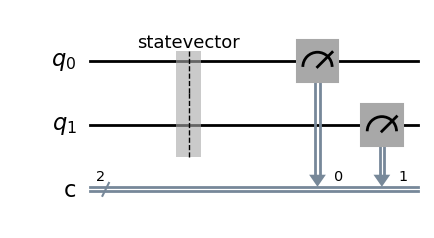

In [4]:
qc_2qubit_base = QuantumCircuit(2, 2)

qc_2qubit_base.save_statevector()

qc_2qubit_base.measure(0, 0)
qc_2qubit_base.measure(1, 1)

display(qc_2qubit_base.draw('mpl')) 

In [5]:
job_2qubit_base = simulator.run(qc_2qubit_base)
result_2qubit_base = job_2qubit_base.result()

state_2qubit_base = result_2qubit_base.data()['statevector']

print("Estado 00")
print(state_2qubit_base[0])

print("\nEstado 01")
print(state_2qubit_base[1])

print("\nEstado 10")
print(state_2qubit_base[2])

print("\nEstado 11")
print(state_2qubit_base[3])


Estado 00
(1+0j)

Estado 01
0j

Estado 10
0j

Estado 11
0j


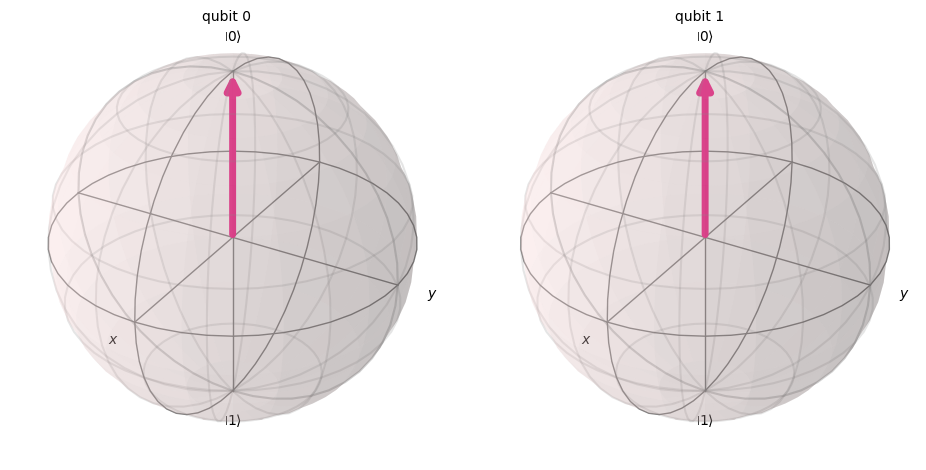

In [6]:
display(plot_bloch_multivector(state_2qubit_base))

# 2.1. Superposição Uniforme em 2 Qubits

Vamos visualizar passo a passo como a aplicação da porta Hadamard em dois qubits ($H \otimes H$) cria a superposição uniforme de 4 estados.

**1. Estados Individuais:**
Sabemos que a porta Hadamard aplicada ao estado $|0\rangle$ resulta em:
$$H|0\rangle = |+\rangle = \frac{1}{\sqrt{2}}(|0\rangle + |1\rangle)$$

**2. O Sistema Conjunto:**
O estado do sistema de 2 qubits é o produto tensorial dos estados individuais:
$$|\psi\rangle = (H|0\rangle) \otimes (H|0\rangle)$$

Substituindo a equação do Hadamard:
$$|\psi\rangle = \left[ \frac{1}{\sqrt{2}}(|0\rangle + |1\rangle) \right] \otimes \left[ \frac{1}{\sqrt{2}}(|0\rangle + |1\rangle) \right]$$

**3. Multiplicação dos Escalares (As constantes):**
Multiplicamos os números fora dos vetores ($\frac{1}{\sqrt{2}} \times \frac{1}{\sqrt{2}} = \frac{1}{2}$):
$$|\psi\rangle = \frac{1}{2} \left[ (|0\rangle + |1\rangle) \otimes (|0\rangle + |1\rangle) \right]$$

**4. Propriedade Distributiva:**
Agora aplicamos a distribuição (multiplicação termo a termo) entre os estados dos vetores:
1.  $|0\rangle \otimes |0\rangle = |00\rangle$
2.  $|0\rangle \otimes |1\rangle = |01\rangle$
3.  $|1\rangle \otimes |0\rangle = |10\rangle$
4.  $|1\rangle \otimes |1\rangle = |11\rangle$

$$|\psi\rangle = \frac{1}{2} \left( |00\rangle + |01\rangle + |10\rangle + |11\rangle \right)$$

**5. Resultado Final (Vetor de Estado):**
Isso resulta em um vetor onde todas as amplitudes são $0.5$:

$$|\psi\rangle = \begin{bmatrix} 0.5 \\ 0.5 \\ 0.5 \\ 0.5 \end{bmatrix}$$

Matematicamente, isso prova que temos **25% de chance** ($|0.5|^2 = 0.25$) de medir qualquer um dos 4 estados possíveis.

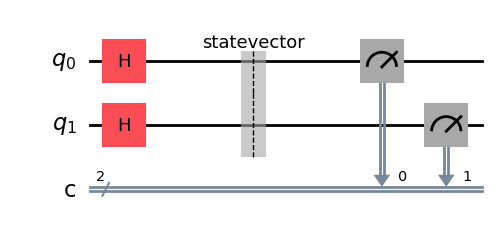

In [7]:
qc_2qubit_hadamard = QuantumCircuit(2, 2)

qc_2qubit_hadamard.h(0)
qc_2qubit_hadamard.h(1)

qc_2qubit_hadamard.save_statevector()

qc_2qubit_hadamard.measure(0, 0) 
qc_2qubit_hadamard.measure(1, 1)

display(qc_2qubit_hadamard.draw('mpl'))

In [8]:
jov_2qubit_hadamard = simulator.run(qc_2qubit_hadamard)
result_2qubit_hadamard = jov_2qubit_hadamard.result()

state_2qubit_hadamard = result_2qubit_hadamard.data()['statevector']

print("Estado 00")
print(state_2qubit_hadamard[0])



print("\nEstado 01")
print(state_2qubit_hadamard[1])

print("\nEstado 10")
print(state_2qubit_hadamard[2])

print("\nEstado 11")
print(state_2qubit_hadamard[3])

Estado 00
(0.5000000000000001+0j)

Estado 01
(0.5000000000000001+0j)

Estado 10
(0.5000000000000001+0j)

Estado 11
(0.5000000000000001+0j)


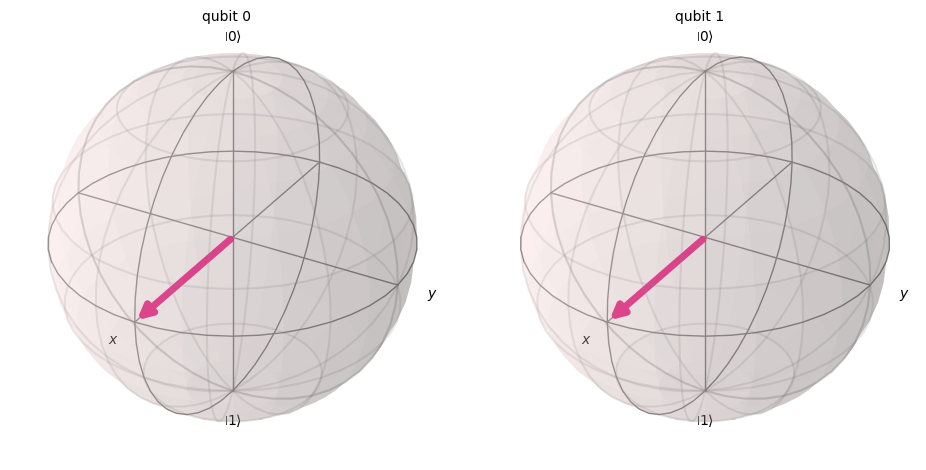

In [9]:
display(plot_bloch_multivector(state_2qubit_hadamard))

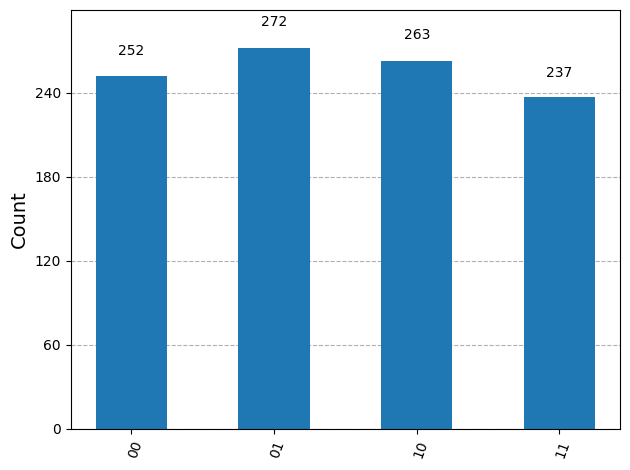

In [10]:
counts_2qubit_hadamard = result_2qubit_hadamard.get_counts(qc_2qubit_hadamard)

display(plot_histogram(counts_2qubit_hadamard))